# Cyclic Dendrimer corona product of C_n and E_m topological indices

## Library Importation 

In [39]:
import numpy as np
import networkx as nx
from scipy.sparse.csgraph import floyd_warshall
import pandas as pd
import math
from collections import Counter
from scipy.linalg import expm
from IPython.display import display
import matplotlib.pyplot as plt

## Graph variables parsing definitions 

In [40]:
class GraphMetrics:
    """A class for calculating graph metrics."""
    def __init__(self, graph):
        self.graph = graph
        self.vertices = list(graph.nodes())
        self.n = len(self.vertices)

    def compute_adjacency_matrix(self):
        """Compute the adjacency matrix of the graph."""
        return nx.to_numpy_array(self.graph)

    def compute_distance_matrix(self):
        """Compute the shortest path distance matrix of the graph."""
        return nx.floyd_warshall_numpy(self.graph)

    def compute_degree_matrix(self):
        """Compute the degree matrix of the graph."""
        degrees = [self.graph.degree(v) for v in self.vertices]
        return np.diag(degrees)

## Topological index definitions under graph parsing 

In [41]:
class GraphIndices:
    """A class for calculating various graph indices. This is for expansion."""

    @staticmethod
    def compute_indices(graph, distances, degrees):
        """Compute various graph indices and return them in a dictionary."""
        # Initialize a dictionary to store index values
        indices = {}

        # Wiener Index
        wiener_index = np.sum(distances[np.isfinite(distances)]) / 2
        indices['Wiener Index'] = wiener_index

        # Hyper-Wiener Index
        n = len(distances)
        hyper_wiener_index = 0
        for i in range(n):
            for j in range(i + 1, n):  # Avoid double counting pairs
                distance = distances[i][j]
                hyper_wiener_index += (distance + distance ** 2)
        hyper_wiener_index /= 2
        indices['Hyper-Wiener Index'] = hyper_wiener_index

        # Harary Index
        reciprocal_distances = np.reciprocal(distances, where=(distances > 0))
        harary_index = np.sum(reciprocal_distances[np.isfinite(reciprocal_distances)]) / 2
        indices['Harary Index'] = harary_index

        # First Zagreb Index
        first_zagreb_index = np.sum(degrees ** 2)
        indices['First Zagreb Index'] = first_zagreb_index

        # Second Zagreb Index
        second_zagreb_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                if node < neighbor:
                    second_zagreb_index += len(neighbors) * len(graph[neighbor])
        indices['Second Zagreb Index'] = second_zagreb_index

        # Sum-Connectivity Index
        sumconnect_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                degree_sum = graph.degree(node) + graph.degree(neighbor)
                sumconnect_index += 1 / math.sqrt(degree_sum)
        sumconnect_index /= 2
        indices['Sum-Connectivity Index'] = sumconnect_index

        # First Randić Index
        first_randic = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                degree_product = graph.degree(node) * graph.degree(neighbor)
                first_randic += 1 / math.sqrt(degree_product)
        first_randic /= 2
        indices['First Randić Index'] = first_randic

        # ABC Index
        abc_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                degree_sum = len(neighbors) + len(graph[neighbor]) - 2
                abc_index += math.sqrt(degree_sum / (len(neighbors) * len(graph[neighbor])))
        abc_index /= 2
        indices['ABC Index'] = abc_index

        # Hyper-Zagreb Index
        hyper_zagreb_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                degree_sum = graph.degree(node) + graph.degree(neighbor)
                hyper_zagreb_index += (degree_sum)**2
        hyper_zagreb_index /= 2
        indices['Hyper-Zagreb Index'] = hyper_zagreb_index

        # Max-Min Index
        max_min_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                if graph.degree(node) > 0 and graph.degree(neighbor) > 0:
                    max_deg = max(graph.degree(node), graph.degree(neighbor))
                    min_deg = min(graph.degree(node), graph.degree(neighbor))
                    quotient = max_deg / min_deg
                    quotient_sqrt = math.sqrt(quotient)
                    max_min_index += quotient_sqrt
        max_min_index /= 2
        indices['Max-Min Index'] = max_min_index

        # Alberston Index
        alberston_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                abs_diff = abs(graph.degree(node) - graph.degree(neighbor))
                alberston_index += abs_diff
        alberston_index /= 2
        indices['Alberston Index'] = alberston_index

        # Sigma Index
        sigma_index = 0
        for node, neighbors in graph.adjacency():
            for neighbor in neighbors:
                diff_sq = (graph.degree(node) - graph.degree(neighbor)) ** 2
                sigma_index += diff_sq
        sigma_index /= 2
        indices['Sigma Index'] = sigma_index

        # Inverse-Symmetry Index
        invsym_index = 0
        visited_nodes = set()  # Set to keep track of visited nodes
        for node, neighbors in graph.adjacency():
            visited_nodes.add(node)  # Mark the current node as visited
            for neighbor in neighbors:
                if neighbor not in visited_nodes:
                    quotient = (graph.degree(node) * graph.degree(neighbor)) / \
                               (graph.degree(node)**2 + graph.degree(neighbor)**2)
                    invsym_index += quotient
        indices['Inverse-Symmetry Index'] = invsym_index

        # Variance Index
        variance_sum = 0
        num_vertices = graph.number_of_nodes()
        num_edges = graph.number_of_edges()

        # Evaluate deg(u)^2 - (2m/n)^2 for all vertices u
        for node, neighbors in graph.adjacency():
            deg_u = len(neighbors)
            variance_sum += deg_u ** 2 - (2 * num_edges / num_vertices) ** 2
        variance_index = variance_sum / num_vertices
        indices['Variance Index'] = variance_index

        # Mostar Index
        mostar_index = 0
        shortest_paths = nx.floyd_warshall(graph)
        vertices = list(graph.nodes())

        for u, v in graph.edges():
            n_u = sum(1 for i, _ in enumerate(vertices) if shortest_paths[i][vertices.index(u)] < shortest_paths[i][vertices.index(v)])
            n_v = sum(1 for i, _ in enumerate(vertices) if shortest_paths[i][vertices.index(v)] < shortest_paths[i][vertices.index(u)])
            mostar_index += abs(n_u - n_v)
        indices['Mostar Index'] = mostar_index

        # Szeged Index
        szeged_index = 0
        for u, v in graph.edges():
            n_u = sum(1 for i, _ in enumerate(vertices) if shortest_paths[i][vertices.index(u)] < shortest_paths[i][vertices.index(v)])
            n_v = sum(1 for i, _ in enumerate(vertices) if shortest_paths[i][vertices.index(v)] < shortest_paths[i][vertices.index(u)])
            szeged_index += (n_u * n_v)
        indices['Szeged Index'] = szeged_index

        # Schultz Index
        schultz_index = 0
        for u in graph.nodes():
            for v in graph.nodes():
                if u != v:
                    degree_sum = graph.degree(u) + graph.degree(v)
                    shortest_path_length = nx.shortest_path_length(graph, source=u, target=v)
                    schultz_index += degree_sum * shortest_path_length
        schultz_index *= 0.5
        indices['Schultz Index'] = schultz_index

        # Gutman Index
        gutman_index = 0
        n = len(distances)
        for i in range(n):
            for j in range(i + 1, n):  # Only consider pairs (i, j), as d(i, j) = d(j, i)
                if np.isfinite(distances[i][j]):  # Avoid adding for disconnected vertices
                    degree_product = degrees[i] * degrees[j]
                    gutman_index += degree_product * distances[i][j]
        indices['Gutman Index'] = gutman_index

        num_edges = corona_graph.number_of_edges()
        num_nodes = corona_graph.number_of_nodes()
        num_components = nx.number_connected_components(corona_graph)
        gamma = num_edges - num_nodes + num_components

        if gamma + 1 != 0:  # Avoid division by zero
            balaban_sum = 0
            for u, v in corona_graph.edges():
                degree_product_sqrt = (degrees[u] * degrees[v]) ** 0.5
                if degree_product_sqrt > 0:
                    balaban_sum += 1 / degree_product_sqrt
            balaban_index = num_edges / (gamma + 1) * balaban_sum
        else:
            balaban_index = float('inf')

        indices['Balaban Index'] = balaban_index

        #Sum-Balaban Index
        normalization_factor = num_edges - num_nodes + 2

        if normalization_factor != 0:  # Avoid division by zero
            sum_balaban_sum = 0
            for u, v in corona_graph.edges():
                weight_sum_sqrt = (degrees[u] + degrees[v]) ** 0.5
                if weight_sum_sqrt > 0:  # Avoid division by zero for isolated nodes
                    sum_balaban_sum += 1 / weight_sum_sqrt
            sum_balaban_index = (num_edges / normalization_factor) * sum_balaban_sum
        else:
            sum_balaban_index = float('inf')  # Handle special case where normalization factor = 0

        indices['Sum-Balaban Index'] = sum_balaban_index

        # Estrada Index
        estrada_index = 0
        eigenvalues = np.linalg.eigvalsh(nx.to_numpy_array(graph))
        estrada_index = np.sum(np.exp(eigenvalues))
        indices['Estrada Index'] = estrada_index

        # Eccentric Connectivity Index (ECI)
        eci = sum(graph.degree(v) * nx.eccentricity(graph)[v] for v in graph.nodes())
        indices['Eccentric Connectivity Index'] = eci

        # Average Eccentricity (AE)
        ae = np.mean(list(nx.eccentricity(graph).values()))
        indices['Average Eccentricity'] = ae

        # Eccentric Distance Sum (EDS)
        shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
        e_ds = sum(nx.eccentricity(graph)[v] * sum(shortest_paths[v].values()) for v in graph.nodes())
        indices['Eccentric Distance Sum'] = e_ds

        # Total Eccentricity (TE)
        te = sum(nx.eccentricity(graph).values())
        indices['Total Eccentricity'] = te

        return indices

## Graph generation 

In [42]:
def corona_product_cycle_empty(n, m):
    """
    Generate the corona product graph C_n ∘ E_m.
    """
    C_n = nx.cycle_graph(n)
    E_m = nx.empty_graph(m)
    G = nx.Graph()
    for v in C_n.nodes():
        G.add_node(v)
    for u, v in C_n.edges():
        G.add_edge(u, v)
    for v in C_n.nodes():
        offset = max(G.nodes()) + 1
        G = nx.disjoint_union(G, E_m)
        for i in range(offset, offset + m):
            G.add_edge(v, i)
    return G

## Main Procedure

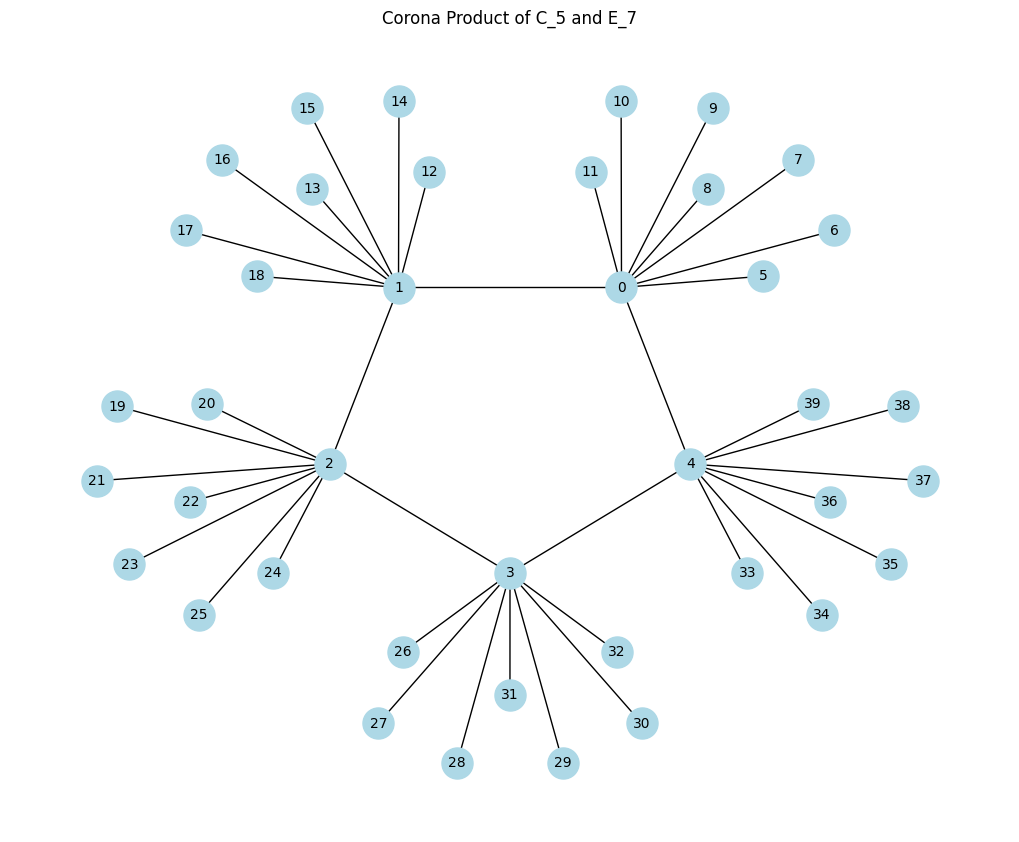

In [43]:
# Generate the corona graph
n = int(input("Enter the number of vertices for the cycle graph (C_n): "))
m = int(input("Enter the number of vertices for the empty graph (E_m): "))
corona_graph = corona_product_cycle_empty(n, m)

plt.figure(figsize=(10, 8))
nx.draw_kamada_kawai(corona_graph, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.title(f"Corona Product of C_{n} and E_{m}")
plt.show()

## Output Display and Visualization

In [44]:
# Compute graph metrics
metrics = GraphMetrics(corona_graph)
distances = metrics.compute_distance_matrix()
degrees = np.array([metrics.graph.degree(v) for v in metrics.vertices])

# Degree distribution
degree_counts = dict()
for _, degree in corona_graph.degree():
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

df_degree = pd.DataFrame(sorted(degree_counts.items()), columns=['Degree k', 'Vertex Count'])
display(df_degree.style.set_properties(**{'text-align': 'left'}).hide(axis="index"))

# Distance distribution
lengths = dict(nx.all_pairs_shortest_path_length(corona_graph))
distance_counter = Counter()
for u, dist_dict in lengths.items():
    for v, dist in dist_dict.items():
        if u < v:
            distance_counter[dist] += 1

df_distance = pd.DataFrame(sorted(distance_counter.items()), columns=['Distance ℓ', 'Pair Count'])
display(df_distance.style.set_properties(**{'text-align': 'left'}).hide(axis="index"))

# Compute graph indices
indices = GraphIndices.compute_indices(corona_graph, distances, degrees)

# Convert indices to DataFrame
indices_df = pd.DataFrame(list(indices.items()), columns=['Topological Index', 'Computed Value'])

# Display the indices
display(indices_df.style.set_properties(**{'text-align': 'left'}).hide(axis="index"))

Degree k,Vertex Count
1,35
9,5


Distance ℓ,Pair Count
1,40
2,180
3,315
4,245


Topological Index,Computed Value
Wiener Index,2325.000000
Hyper-Wiener Index,4920.000000
Harary Index,296.250000
First Zagreb Index,440.000000
Second Zagreb Index,720.000000
Sum-Connectivity Index,12.246483
First Randić Index,12.222222
ABC Index,35.220539
Hyper-Zagreb Index,5120.000000
Max-Min Index,110.000000
